In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('topics_country_year.csv')

In [5]:
df.columns

Index(['DOI', 'topic', 'probability', 'Name', 'embedding', 'Column1',
       'earliest_pub_year', 'affiliations', 'num_affiliation'],
      dtype='object')

In [11]:
top10_topics = df.value_counts('Name')[1:11]
top10_topics

Name
0_bp_holocene_ka_cal                         1701
1_vegetation_china_precipitation_trend       1235
2_ice_model_sea_aerosol                      1171
3_scenarios_future_rcp_water                  788
4_farmers_adaptation_households_household     786
5_building_energy_buildings_thermal           684
6_injection_oil_co2_reservoir                 625
7_urban_energy_adaptation_development         574
8_pacific_anomalies_anomalous_sst             531
9_co2 emissions_emissions_china_carbon        393
Name: count, dtype: int64

In [78]:
top10_affiliations = df.value_counts('affiliations')[1:11]
top25_affiliations = df.value_counts('affiliations')[1:26]

In [79]:
top10_df = df[df['Name'].isin(top10_topics.index) & df['affiliations'].isin(top10_affiliations.index)]

In [80]:
top10_df_grouped = top10_df.groupby(['earliest_pub_year', 'affiliations', 'Name']).size().reset_index(name='count')

In [81]:
top10_df_grouped 

,earliest_pub_year,affiliations,Name,count
0,2013,['Canada'],0_bp_holocene_ka_cal,1
1,2013,['Canada'],6_injection_oil_co2_reservoir,3
2,2013,"['China', 'USA']",1_vegetation_china_precipitation_trend,2
3,2013,"['China', 'USA']",8_pacific_anomalies_anomalous_sst,6
4,2013,['China'],0_bp_holocene_ka_cal,1
...,...,...,...,...
484,2023,['USA'],4_farmers_adaptation_households_household,2
485,2023,['USA'],5_building_energy_buildings_thermal,8
486,2023,['USA'],6_injection_oil_co2_reservoir,13
487,2023,['USA'],7_urban_energy_adaptation_development,7


<Figure size 1200x1200 with 0 Axes>

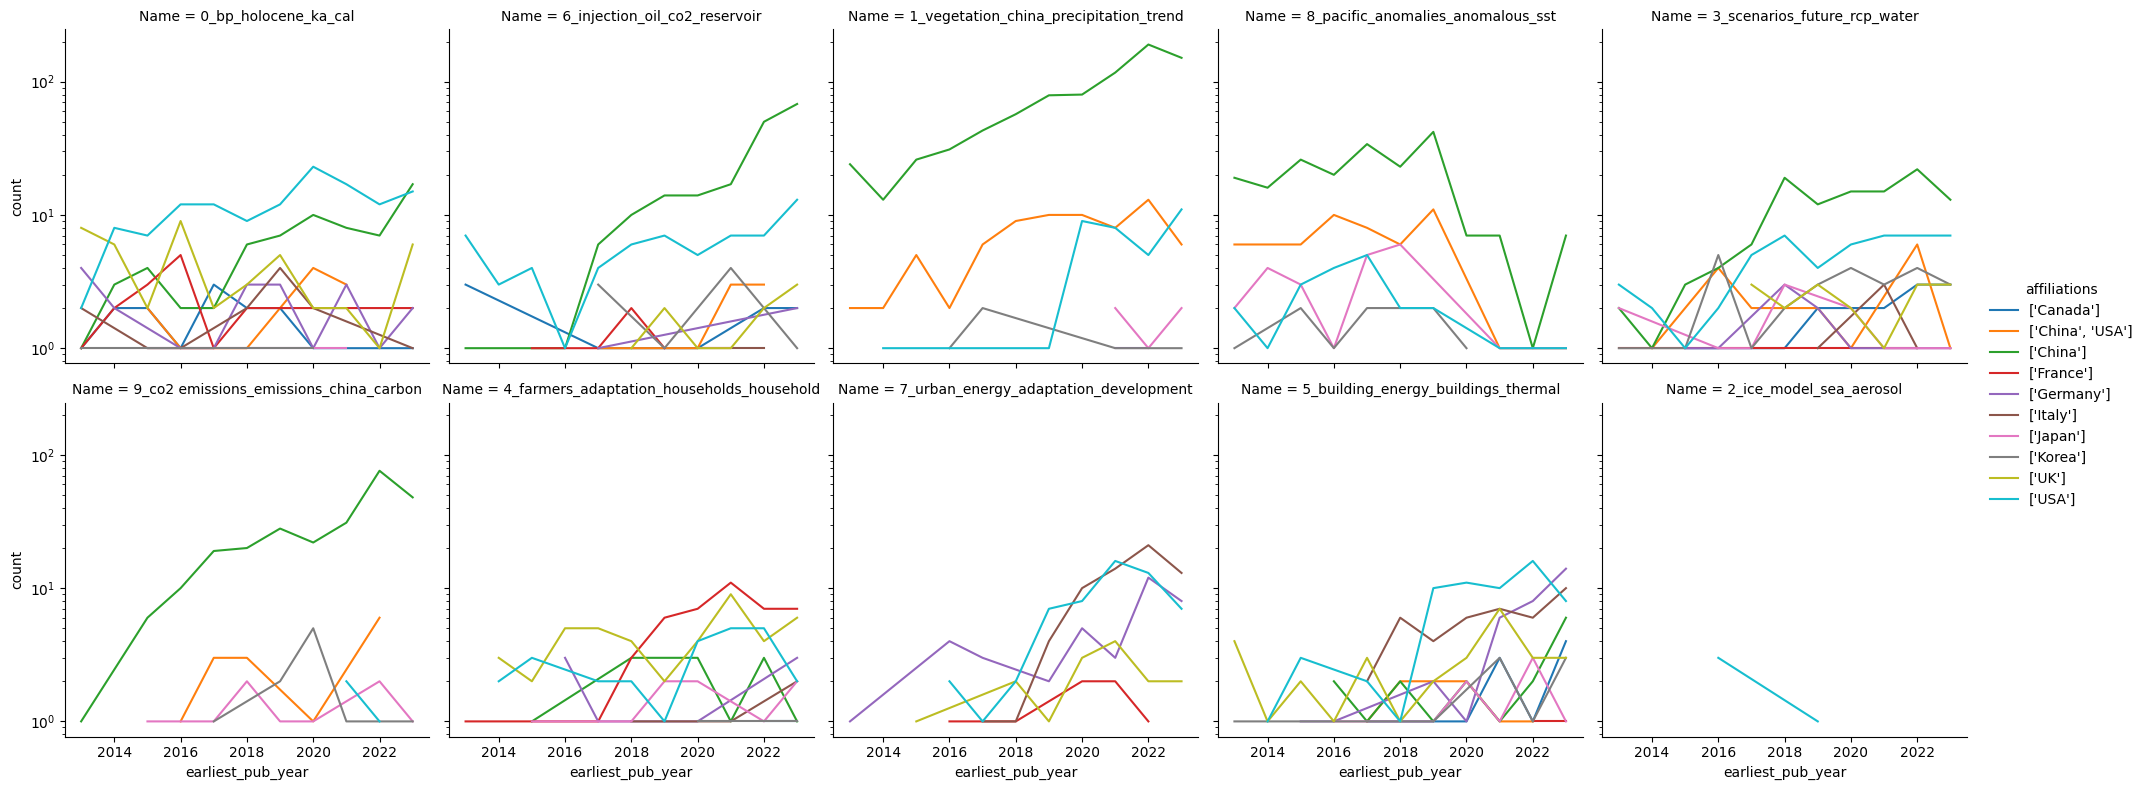

In [82]:
plt.figure(figsize=(12,12))
g = sns.FacetGrid(data = top10_df_grouped, col="Name",hue="affiliations", col_wrap=5, height=4) 
g.map(sns.lineplot, "earliest_pub_year", "count")
g.set(yscale="log")
g.add_legend()
plt.show()


In [85]:
country_df = df[df['affiliations'].isin(top25_affiliations.index)].groupby(['earliest_pub_year', 'affiliations']).size().reset_index(name='count')

In [86]:
country_df

,earliest_pub_year,affiliations,count
0,2013,['Brazil'],11
1,2013,['Canada'],63
2,2013,"['China', 'USA']",25
3,2013,['China'],105
4,2013,['Finland'],5
...,...,...,...
270,2023,"['UK', 'USA']",19
271,2023,['UK'],278
272,2023,"['USA', 'China']",21
273,2023,"['USA', 'UK']",29


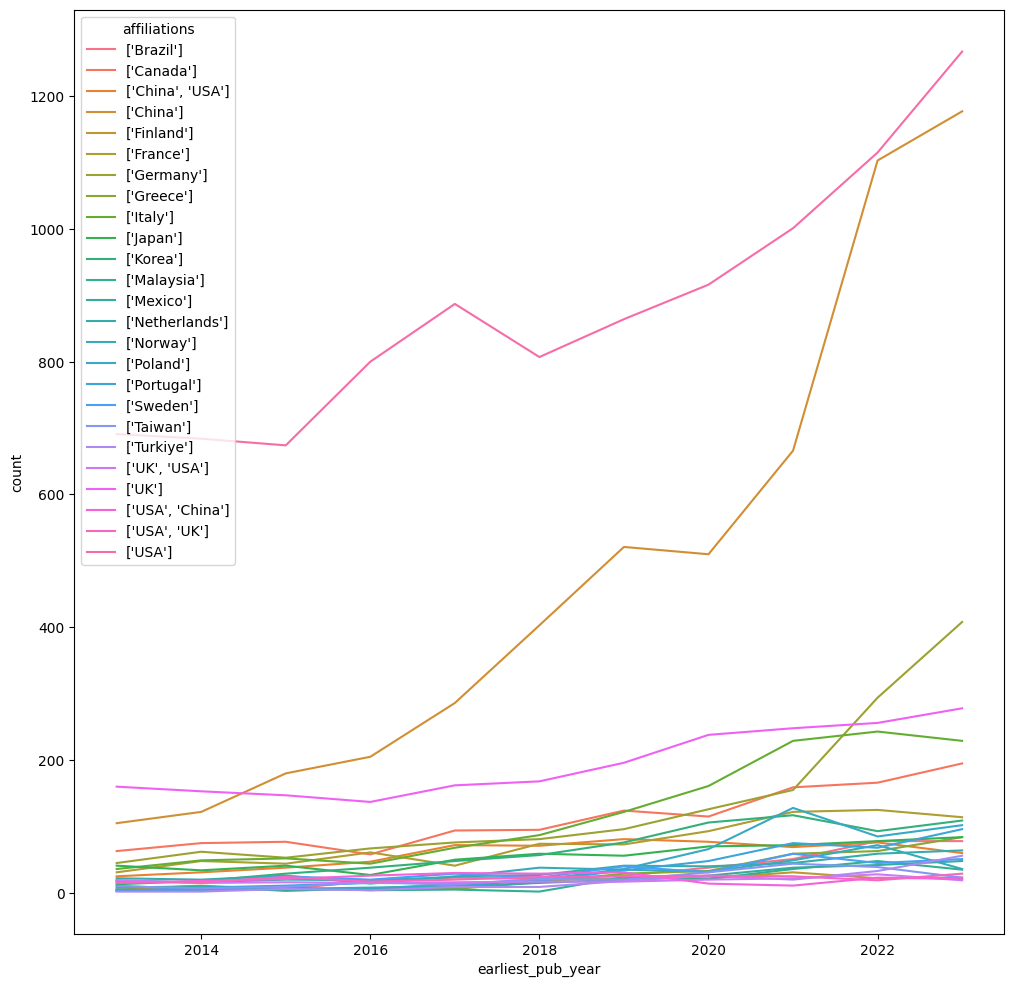

In [89]:
plt.figure(figsize=(12,12))
sns.lineplot(data = country_df, x = 'earliest_pub_year', y = 'count', hue = 'affiliations')
#plt.yscale('log')
plt.show()

In [109]:
proportion_international = pd.DataFrame(df[df['num_affiliation'] > 0].groupby('earliest_pub_year').value_counts(['num_affiliation'],normalize = True)).reset_index()

In [111]:
print(proportion_international.sort_values('earliest_pub_year'))

     earliest_pub_year  num_affiliation  proportion
0                 2013                1    0.772390
1                 2013                2    0.171706
2                 2013                3    0.027382
3                 2013                4    0.012550
4                 2013                5    0.005705
..                 ...              ...         ...
112               2023                2    0.160372
111               2023                1    0.780231
121               2023               10    0.000152
115               2023                5    0.005787
122               2023               12    0.000152

[123 rows x 3 columns]


In [112]:
p_domestic = proportion_international[proportion_international['num_affiliation'] == 1]
p_domestic['international'] = 1 - p_domestic['proportion']

/var/folders/1g/6pgh6bw14hgcbgppl7q0jgfr0000gn/T/ipykernel_3417/2552320913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_domestic['international'] = 1 - p_domestic['proportion']


<Axes: xlabel='earliest_pub_year', ylabel='international'>

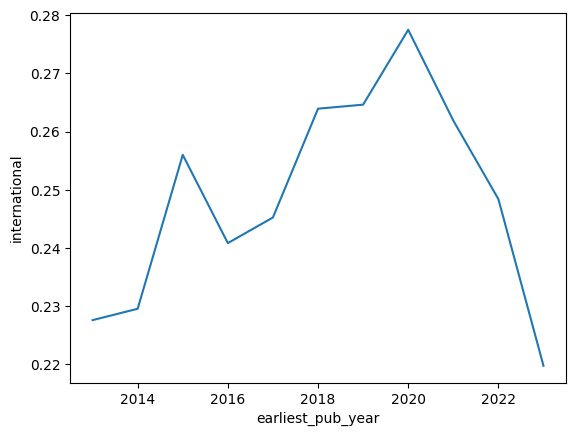

In [114]:
sns.lineplot(data = p_domestic, x = 'earliest_pub_year', y = 'international')